#  LINEAR REGRESSION

In [154]:
# importing libraries
import pandas as pd
import numpy as np

# import linear regression machine learning library
from sklearn.linear_model import LinearRegression

# importing ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
plt.style.use('classic')

%matplotlib inline

In [155]:
# reading the CSV file into pandas dataframe
df = pd.read_csv(r'C:\Users\DELL\Downloads\Social_Network_Ads.csv')
display(df)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [156]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [157]:
df.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [158]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [159]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [160]:
X = df.iloc[:, [3]].values
y = df.iloc[:, 4].values
display(df)
print(X)
print(y)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


[[ 19000]
 [ 20000]
 [ 43000]
 [ 57000]
 [ 76000]
 [ 58000]
 [ 84000]
 [150000]
 [ 33000]
 [ 65000]
 [ 80000]
 [ 52000]
 [ 86000]
 [ 18000]
 [ 82000]
 [ 80000]
 [ 25000]
 [ 26000]
 [ 28000]
 [ 29000]
 [ 22000]
 [ 49000]
 [ 41000]
 [ 22000]
 [ 23000]
 [ 20000]
 [ 28000]
 [ 30000]
 [ 43000]
 [ 18000]
 [ 74000]
 [137000]
 [ 16000]
 [ 44000]
 [ 90000]
 [ 27000]
 [ 28000]
 [ 49000]
 [ 72000]
 [ 31000]
 [ 17000]
 [ 51000]
 [108000]
 [ 15000]
 [ 84000]
 [ 20000]
 [ 79000]
 [ 54000]
 [135000]
 [ 89000]
 [ 32000]
 [ 44000]
 [ 83000]
 [ 23000]
 [ 58000]
 [ 55000]
 [ 48000]
 [ 79000]
 [ 18000]
 [117000]
 [ 20000]
 [ 87000]
 [ 66000]
 [120000]
 [ 83000]
 [ 58000]
 [ 19000]
 [ 82000]
 [ 63000]
 [ 68000]
 [ 80000]
 [ 27000]
 [ 23000]
 [113000]
 [ 18000]
 [112000]
 [ 52000]
 [ 27000]
 [ 87000]
 [ 17000]
 [ 80000]
 [ 42000]
 [ 49000]
 [ 88000]
 [ 62000]
 [118000]
 [ 55000]
 [ 85000]
 [ 81000]
 [ 50000]
 [ 81000]
 [116000]
 [ 15000]
 [ 28000]
 [ 83000]
 [ 44000]
 [ 25000]
 [123000]
 [ 73000]
 [ 37000]


In [161]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[ 15000]
 [102000]
 [112000]
 [107000]
 [ 53000]
 [ 59000]
 [ 41000]
 [134000]
 [113000]
 [148000]
 [ 15000]
 [ 42000]
 [ 19000]
 [149000]
 [ 96000]
 [ 59000]
 [ 96000]
 [ 89000]
 [ 72000]
 [ 26000]
 [ 69000]
 [ 82000]
 [ 74000]
 [ 80000]
 [ 72000]
 [149000]
 [ 71000]
 [146000]
 [ 79000]
 [ 75000]
 [ 51000]
 [ 75000]
 [ 78000]
 [ 61000]
 [108000]
 [ 82000]
 [ 74000]
 [ 65000]
 [ 80000]
 [117000]
 [ 61000]
 [ 68000]
 [ 44000]
 [ 87000]
 [ 33000]
 [ 90000]
 [ 42000]
 [123000]
 [118000]
 [ 87000]
 [ 71000]
 [ 70000]
 [ 39000]
 [ 23000]
 [147000]
 [138000]
 [ 86000]
 [ 79000]
 [138000]
 [ 23000]
 [ 60000]
 [113000]
 [107000]
 [ 33000]
 [ 80000]
 [ 96000]
 [ 18000]
 [ 71000]
 [129000]
 [ 76000]
 [ 44000]
 [118000]
 [ 90000]
 [ 30000]
 [ 43000]
 [ 78000]
 [ 59000]
 [ 42000]
 [ 74000]
 [ 91000]
 [ 59000]
 [ 57000]
 [143000]
 [ 26000]
 [ 38000]
 [113000]
 [143000]
 [ 27000]
 [101000]
 [ 45000]
 [ 82000]
 [ 23000]
 [ 65000]
 [ 84000]
 [ 59000]
 [ 84000]
 [ 28000]
 [ 71000]
 [ 55000]
 [ 35000]


In [162]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [163]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred)

[0.44992409 0.26562546 0.39015156 0.41007574 0.26562546 0.11619414
 0.09128892 0.73384361 0.35528426 0.23075815 0.26064442 0.29053068
 0.29053068 0.40011365 0.44494305 0.59935542 0.40011365 0.43996201
 0.66410899 0.12615623 0.25068233 0.73384361 0.27060651 0.53958289
 0.15604249 0.71890048 0.44992409 0.41505679 0.32539799 0.44494305
 0.45490514 0.41007574 0.3154359  0.28056859 0.30547381 0.27558755
 0.42003783 0.23075815 0.18592876 0.19589084 0.45490514 0.27558755
 0.43498096 0.11619414 0.5744502  0.30547381 0.41505679 0.46486723
 0.16600458 0.44494305 0.62426064 0.14109936 0.30049277 0.58939333
 0.45490514 0.17596667 0.42999992 0.41505679 0.15604249 0.11619414
 0.10623205 0.22577711 0.39513261 0.50969662 0.1460804  0.42999992
 0.45988618 0.30547381 0.25068233 0.36524634 0.76372987 0.40011365
 0.33037904 0.12615623 0.45988618 0.42501887 0.41007574 0.3154359
 0.18592876 0.54954498 0.73384361 0.42999992 0.29053068 0.1909098
 0.20585293 0.41505679 0.39015156 0.66410899 0.22079607 0.315435

In [164]:
print('Train Score: ', regressor.score(X_train, y_train))  
print('Test Score: ', regressor.score(X_test, y_test))  

Train Score:  0.12810578238576498
Test Score:  0.13607825572923682


In [165]:
df.median()

C:\Users\DELL\AppData\Local\Temp\ipykernel_868\530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


User ID            15694341.5
Age                      37.0
EstimatedSalary       70000.0
Purchased                 0.0
dtype: float64

In [166]:
from sklearn import metrics

mae=metrics.mean_absolute_error(y_test, y_pred)
print("mean absolute error=",mae)
mse=metrics.mean_squared_error(y_test, y_pred)
print("mean squared error=",mse)
smse=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("sqrt of mean squared error=",smse)

mean absolute error= 0.398925266815641
mean squared error= 0.19432239789534733
sqrt of mean squared error= 0.44082014234305056


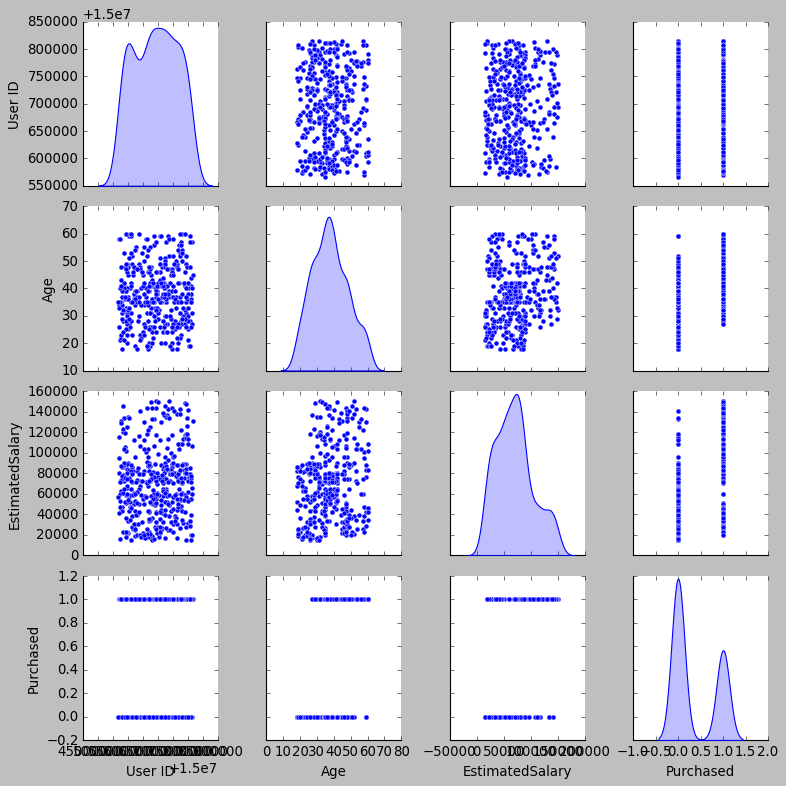

In [167]:
sns.pairplot(df, diag_kind='kde')

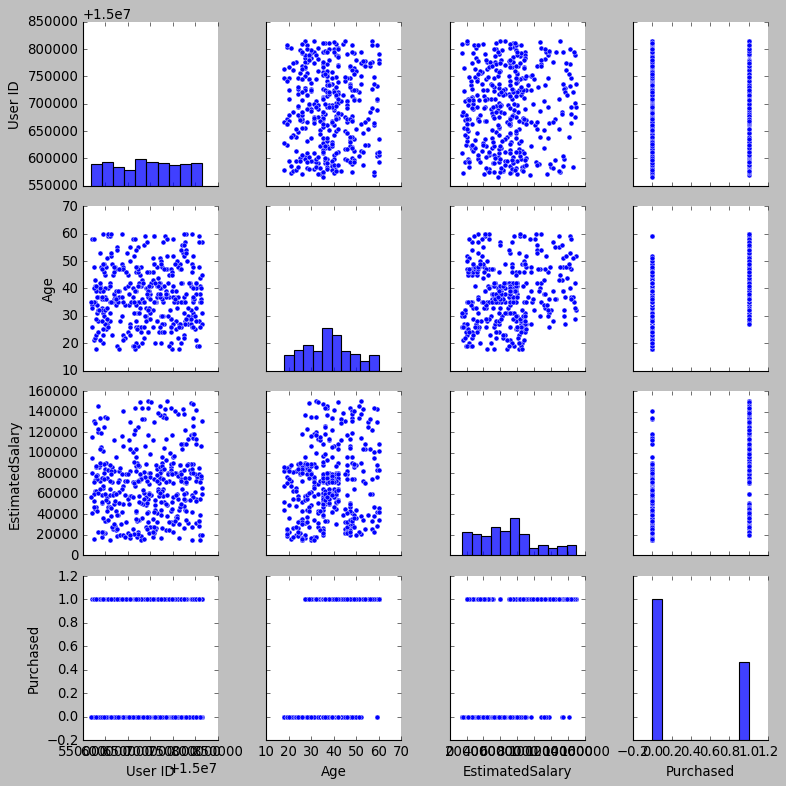

In [168]:
sns.pairplot(df)

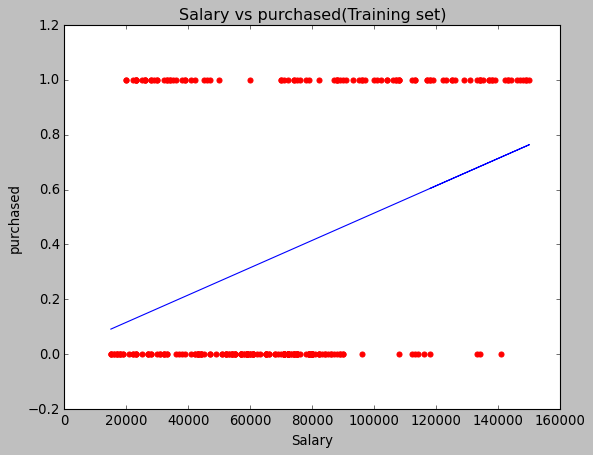

In [170]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs purchased(Training set)')
plt.xlabel('Salary')
plt.ylabel('purchased')
plt.show()

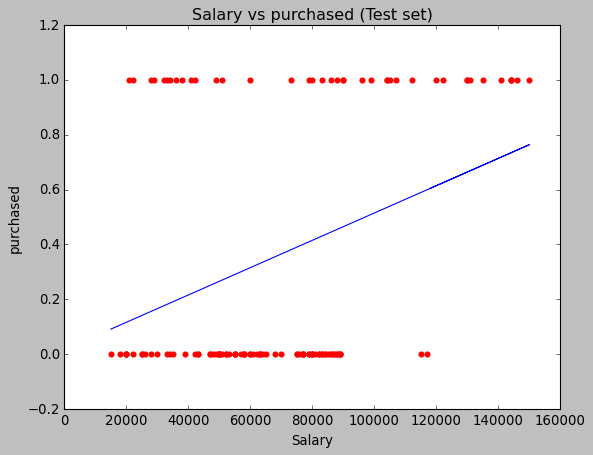

In [171]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs purchased (Test set)')
plt.xlabel('Salary')
plt.ylabel('purchased')
plt.show()

In the above linear regression model predicted values score is less than 30 and the scatter plot
not fit as a linear it looks like parallel lines so,linear regression model is not suitable for this.
so, we jump to logistic regression to forecast the values.

# LOGISTIC REGRESSION

In [172]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [173]:
# Importing the dataset
dfl = pd.read_csv(r'C:\Users\DELL\Downloads\Social_Network_Ads.csv')
X = dfl.iloc[:, [3]].values
y = dfl.iloc[:, 4].values
print(X)
print(y)

[[ 19000]
 [ 20000]
 [ 43000]
 [ 57000]
 [ 76000]
 [ 58000]
 [ 84000]
 [150000]
 [ 33000]
 [ 65000]
 [ 80000]
 [ 52000]
 [ 86000]
 [ 18000]
 [ 82000]
 [ 80000]
 [ 25000]
 [ 26000]
 [ 28000]
 [ 29000]
 [ 22000]
 [ 49000]
 [ 41000]
 [ 22000]
 [ 23000]
 [ 20000]
 [ 28000]
 [ 30000]
 [ 43000]
 [ 18000]
 [ 74000]
 [137000]
 [ 16000]
 [ 44000]
 [ 90000]
 [ 27000]
 [ 28000]
 [ 49000]
 [ 72000]
 [ 31000]
 [ 17000]
 [ 51000]
 [108000]
 [ 15000]
 [ 84000]
 [ 20000]
 [ 79000]
 [ 54000]
 [135000]
 [ 89000]
 [ 32000]
 [ 44000]
 [ 83000]
 [ 23000]
 [ 58000]
 [ 55000]
 [ 48000]
 [ 79000]
 [ 18000]
 [117000]
 [ 20000]
 [ 87000]
 [ 66000]
 [120000]
 [ 83000]
 [ 58000]
 [ 19000]
 [ 82000]
 [ 63000]
 [ 68000]
 [ 80000]
 [ 27000]
 [ 23000]
 [113000]
 [ 18000]
 [112000]
 [ 52000]
 [ 27000]
 [ 87000]
 [ 17000]
 [ 80000]
 [ 42000]
 [ 49000]
 [ 88000]
 [ 62000]
 [118000]
 [ 55000]
 [ 85000]
 [ 81000]
 [ 50000]
 [ 81000]
 [116000]
 [ 15000]
 [ 28000]
 [ 83000]
 [ 44000]
 [ 25000]
 [123000]
 [ 73000]
 [ 37000]


In [174]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[ 15000]
 [102000]
 [112000]
 [107000]
 [ 53000]
 [ 59000]
 [ 41000]
 [134000]
 [113000]
 [148000]
 [ 15000]
 [ 42000]
 [ 19000]
 [149000]
 [ 96000]
 [ 59000]
 [ 96000]
 [ 89000]
 [ 72000]
 [ 26000]
 [ 69000]
 [ 82000]
 [ 74000]
 [ 80000]
 [ 72000]
 [149000]
 [ 71000]
 [146000]
 [ 79000]
 [ 75000]
 [ 51000]
 [ 75000]
 [ 78000]
 [ 61000]
 [108000]
 [ 82000]
 [ 74000]
 [ 65000]
 [ 80000]
 [117000]
 [ 61000]
 [ 68000]
 [ 44000]
 [ 87000]
 [ 33000]
 [ 90000]
 [ 42000]
 [123000]
 [118000]
 [ 87000]
 [ 71000]
 [ 70000]
 [ 39000]
 [ 23000]
 [147000]
 [138000]
 [ 86000]
 [ 79000]
 [138000]
 [ 23000]
 [ 60000]
 [113000]
 [107000]
 [ 33000]
 [ 80000]
 [ 96000]
 [ 18000]
 [ 71000]
 [129000]
 [ 76000]
 [ 44000]
 [118000]
 [ 90000]
 [ 30000]
 [ 43000]
 [ 78000]
 [ 59000]
 [ 42000]
 [ 74000]
 [ 91000]
 [ 59000]
 [ 57000]
 [143000]
 [ 26000]
 [ 38000]
 [113000]
 [143000]
 [ 27000]
 [101000]
 [ 45000]
 [ 82000]
 [ 23000]
 [ 65000]
 [ 84000]
 [ 59000]
 [ 84000]
 [ 28000]
 [ 71000]
 [ 55000]
 [ 35000]


In [175]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-1.5849703 ]
 [ 0.93098672]
 [ 1.22017719]
 [ 1.07558195]
 [-0.48604654]
 [-0.31253226]
 [-0.8330751 ]
 [ 1.8563962 ]
 [ 1.24909623]
 [ 2.26126285]
 [-1.5849703 ]
 [-0.80415605]
 [-1.46929411]
 [ 2.2901819 ]
 [ 0.75747245]
 [-0.31253226]
 [ 0.75747245]
 [ 0.55503912]
 [ 0.06341534]
 [-1.26686079]
 [-0.0233418 ]
 [ 0.3526058 ]
 [ 0.12125343]
 [ 0.29476771]
 [ 0.06341534]
 [ 2.2901819 ]
 [ 0.03449629]
 [ 2.20342476]
 [ 0.26584866]
 [ 0.15017248]
 [-0.54388463]
 [ 0.15017248]
 [ 0.23692961]
 [-0.25469417]
 [ 1.104501  ]
 [ 0.3526058 ]
 [ 0.12125343]
 [-0.13901799]
 [ 0.29476771]
 [ 1.36477242]
 [-0.25469417]
 [-0.05226085]
 [-0.74631796]
 [ 0.49720103]
 [-1.06442747]
 [ 0.58395817]
 [-0.80415605]
 [ 1.53828669]
 [ 1.39369146]
 [ 0.49720103]
 [ 0.03449629]
 [ 0.00557724]
 [-0.89091319]
 [-1.35361793]
 [ 2.2323438 ]
 [ 1.97207239]
 [ 0.46828198]
 [ 0.26584866]
 [ 1.97207239]
 [-1.35361793]
 [-0.28361322]
 [ 1.24909623]
 [ 1.07558195]
 [-1.06442747]
 [ 0.29476771]
 [ 0.75747245]
 [-1.49821

In [176]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [177]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0]


In [178]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[77  2]
 [23 18]]


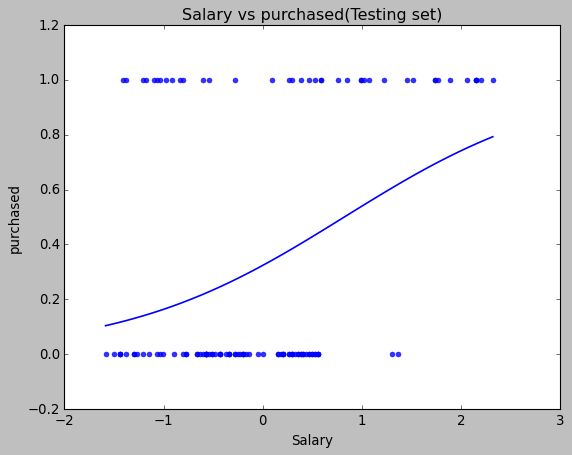

In [179]:
import seaborn as sns

sns.regplot(x=X_test, y=y_test, data=df, logistic=True, ci=None)
plt.title('Salary vs purchased(Testing set)')
plt.xlabel('Salary')
plt.ylabel('purchased')
plt.show()

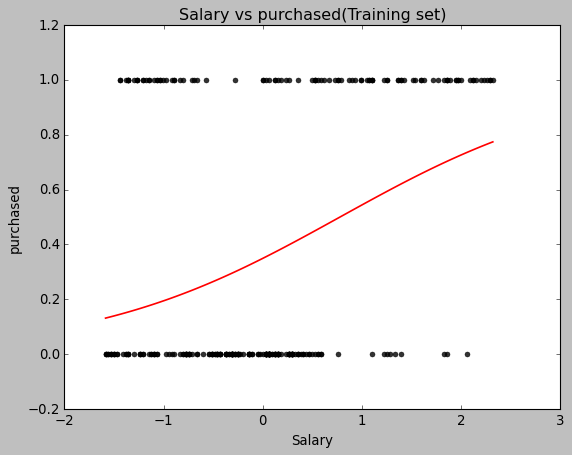

In [182]:
sns.regplot(x=X_train, y=y_train, data=df, logistic=True, ci=None,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
plt.title('Salary vs purchased(Training set)')
plt.xlabel('Salary')
plt.ylabel('purchased')
plt.show()